# REPRODUCIBLE RESEARCH

## To do reproducible research we used project from unsupervised machine learning course. The code is written in R, and our aim is to translate it to Python. We will reproduce the results and discuss findings, any potential problems and provide some conclusion. 

### The project was to cluster workation (work + vacation) data and compare the clusters with given ranking. 

In [27]:
# Load the libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from mlxtend.plotting import plot_pca_correlation_graph
from IPython.display import display

from numpy.random import uniform

# from helpers import hopkins_statistic


In [13]:
# Load the data from working directory
raw_data = pd.read_csv("workation.csv", sep=';')

### To set your working directory, use the below code

In [ ]:
# import os
# print os.getcwd() # Print the current working directory
# os.chdir('c:\\Users\\uname\\desktop\\python')  # Provide the new path here


## EDA

In [14]:
# Preview the data
display(raw_data.head())
display(raw_data.describe())

,Ranking,City,Country,Remote connection: Average WiFi speed (Mbps per second),Co-working spaces: Number of co-working spaces,Caffeine: Average price of buying a coffee,Travel: Average price of taxi (per km),After-work drinks: Average price for 2 beers in a bar,Accommodation: Average price of 1 bedroom apartment per month,"Food: Average cost of a meal at a local, mid-level restaurant",Climate: Average number of sunshine hours,Tourist attractions: Number of ‘Things to do’ on Tripadvisor,Instagramability: Number of photos with #
0,1,Bangkok,Thailand,28,117,1.56,0.82,3.08,415.18,1.54,2624,2262,28386616
1,2,New Delhi,India,12,165,1.42,0.19,2.90,179.25,2.90,2685,2019,28528249
2,3,Lisbon,Portugal,33,95,1.56,0.40,3.42,736.19,7.69,2806,1969,10205538
3,4,Barcelona,Spain,37,136,1.59,1.01,5.12,768.46,10.25,2591,2739,62894055
4,5,Buenos Aires,Argentina,17,67,1.22,0.47,2.16,229.55,5.15,2525,1660,21293975


,Ranking,Remote connection: Average WiFi speed (Mbps per second),Co-working spaces: Number of co-working spaces,Caffeine: Average price of buying a coffee,Travel: Average price of taxi (per km),After-work drinks: Average price for 2 beers in a bar,Accommodation: Average price of 1 bedroom apartment per month,"Food: Average cost of a meal at a local, mid-level restaurant",Climate: Average number of sunshine hours,Tourist attractions: Number of ‘Things to do’ on Tripadvisor,Instagramability: Number of photos with #
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,1.470000e+02
mean,73.938776,26.823129,48.435374,2.279796,1.005442,6.204150,719.551020,8.158639,2409.619048,1042.891156,1.883580e+07
std,42.602210,16.386889,50.320897,0.875517,0.561604,3.561373,424.714931,4.382837,662.858446,1139.228765,2.573515e+07
min,1.000000,2.000000,0.000000,0.830000,0.150000,1.080000,83.020000,1.250000,1203.000000,70.000000,4.094700e+05
25%,37.500000,14.500000,13.000000,1.565000,0.545000,3.340000,370.315000,4.800000,1863.000000,457.500000,4.376657e+06
50%,74.000000,25.000000,33.000000,2.340000,0.940000,5.740000,642.770000,8.520000,2468.000000,741.000000,9.950961e+06
75%,110.500000,34.500000,65.500000,2.865000,1.310000,8.570000,933.220000,11.495000,2897.000000,1336.500000,2.151362e+07
max,147.000000,93.000000,318.000000,6.100000,3.000000,17.800000,2171.680000,19.760000,3940.000000,10269.000000,1.507026e+08


### Rename columns for easier use

In [16]:
# Rename columns
raw_data.rename(columns={
    'Remote connection: Average WiFi speed (Mbps per second)': 'WiFi',
    'Co-working spaces: Number of co-working spaces': 'CoWorking',
    'Caffeine: Average price of buying a coffee': 'Coffee',
    'Travel: Average price of taxi (per km)': 'Taxi',
    'After-work drinks: Average price for 2 beers in a bar': 'Beer',
    'Accommodation: Average price of 1 bedroom apartment per month': 'Accommodation',
    'Food: Average cost of a meal at a local, mid-level restaurant': 'Food',
    'Climate: Average number of sunshine hours': 'Sunshine',
    'Tourist attractions: Number of ‘Things to do’ on Tripadvisor': 'Attractions',
    'Instagramability: Number of photos with #': 'Instagram'
}, inplace=True)

raw_data.head(3)

,Ranking,City,Country,WiFi,CoWorking,Coffee,Taxi,Beer,Accommodation,Food,Sunshine,Attractions,Instagram
0,1,Bangkok,Thailand,28,117,1.56,0.82,3.08,415.18,1.54,2624,2262,28386616
1,2,New Delhi,India,12,165,1.42,0.19,2.90,179.25,2.90,2685,2019,28528249
2,3,Lisbon,Portugal,33,95,1.56,0.40,3.42,736.19,7.69,2806,1969,10205538


In [28]:
#Remove ranking, city and country from the dataset as they are not informative
data = raw_data.loc[:, 'WiFi':'Instagram']

In [29]:
# Check for NAs:
print(data.isna().any()) # no NAs

WiFi             False
CoWorking        False
Coffee           False
Taxi             False
Beer             False
Accommodation    False
Food             False
Sunshine         False
Attractions      False
Instagram        False
dtype: bool


### Create a boxplot for every variable

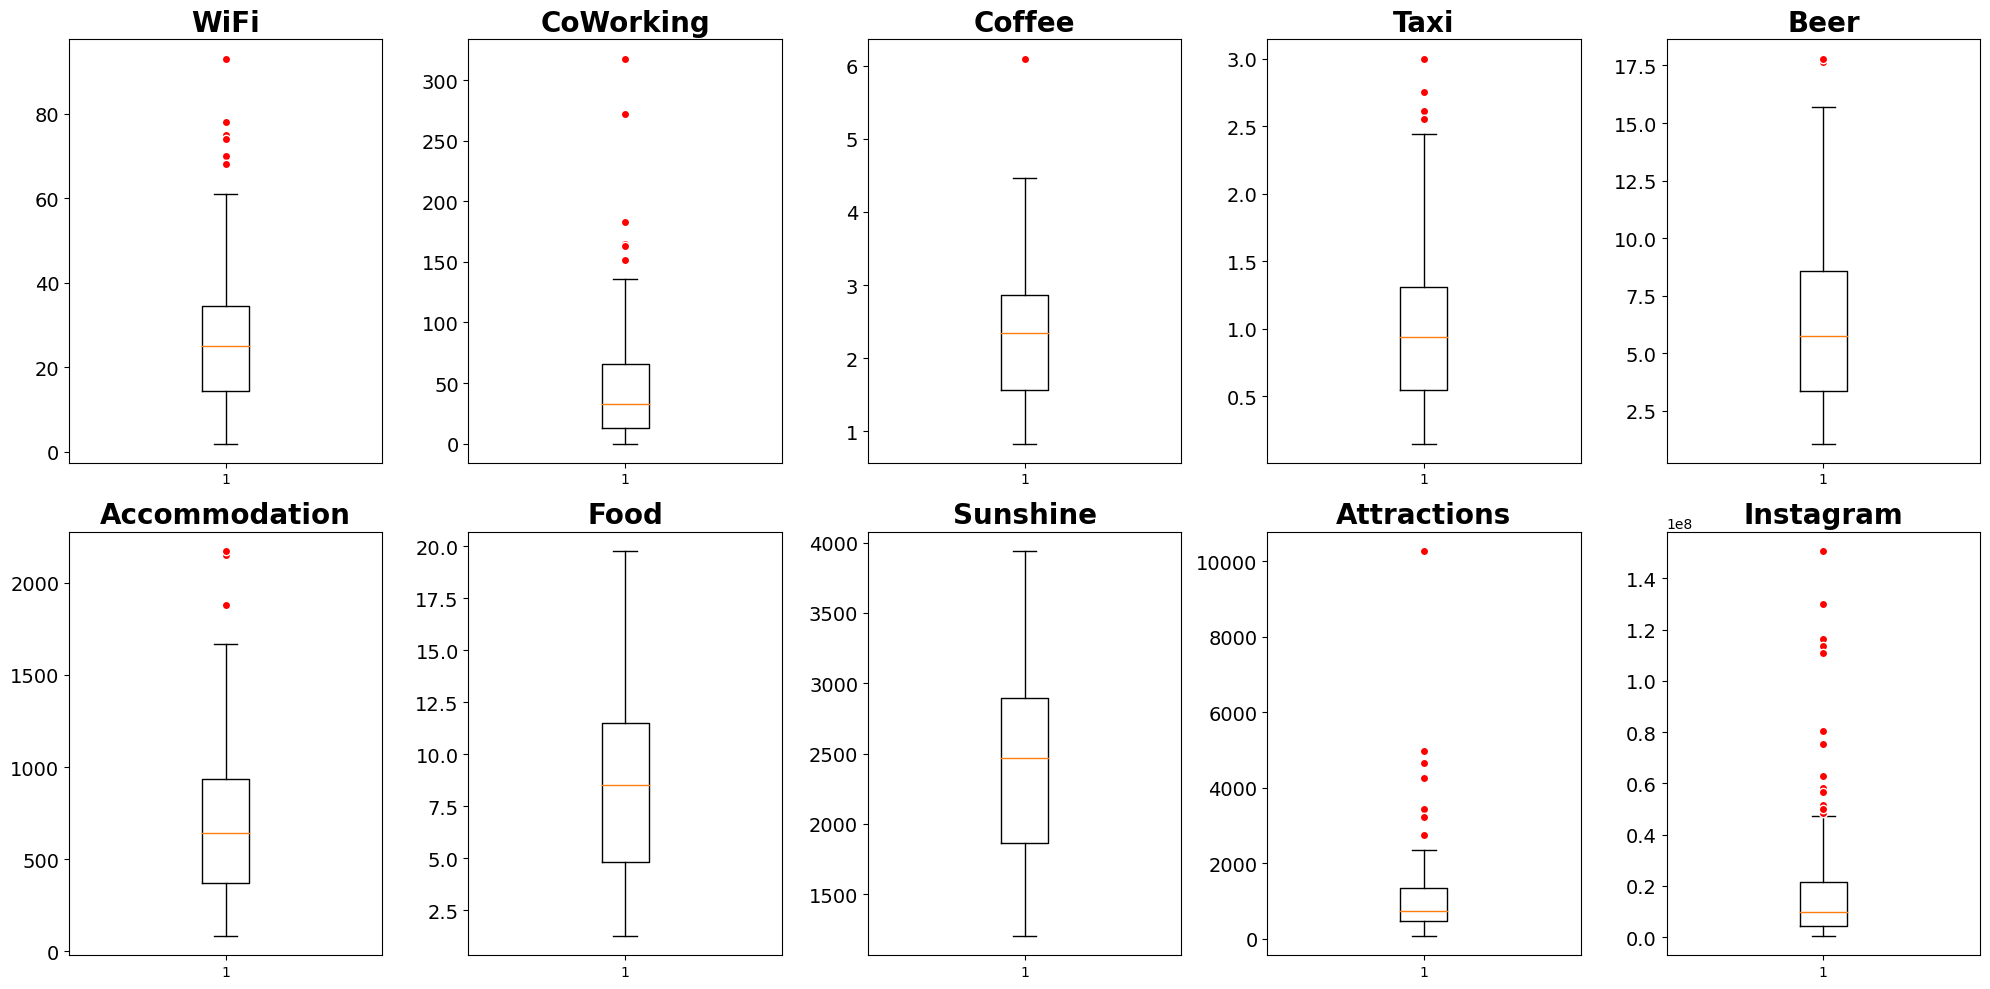

In [8]:
# Boxplots
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(data.iloc[:, i], flierprops=red_circle)
    ax.set_title(data.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

### Plot correlation matrix

<Axes: >

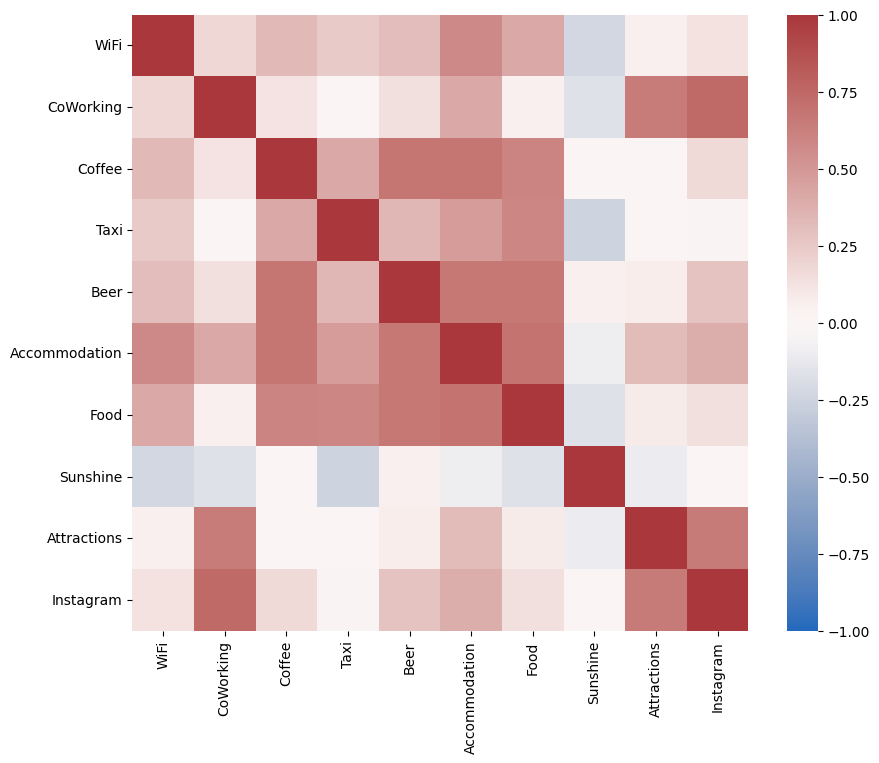

In [31]:
# Correlation
corr_data = data.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_data,
    cmap=sns.color_palette("vlag", 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

### Normalize the data

In [32]:
# Normalize the data
scaler = StandardScaler()
data_s = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

## PCA

In [21]:
# Perform PCA for all 10 components
pca = PCA(n_components=10)

# Fit and transform the data
pca.fit_transform(data_s)


array([[-1.08032559,  2.24079427, -0.20132302, ..., -0.0427179 ,
        -0.53817195, -0.57496978],
       [-1.72681301,  2.97660956,  0.3106337 , ..., -1.05372492,
        -0.05432882, -0.95085998],
       [-0.61464475,  1.30361118,  0.09439809, ..., -0.96544909,
         0.11441867, -0.21858914],
       ...,
       [ 3.81786475, -2.84818547, -0.68522873, ..., -0.44805594,
        -0.11041616,  0.31941946],
       [ 0.86680341, -2.39379738,  0.24096913, ..., -0.64363569,
         0.55883517,  0.08849166],
       [ 2.63144286, -2.34384193, -0.85771711, ...,  0.23301724,
        -0.83755006,  0.11560643]])

### Plots

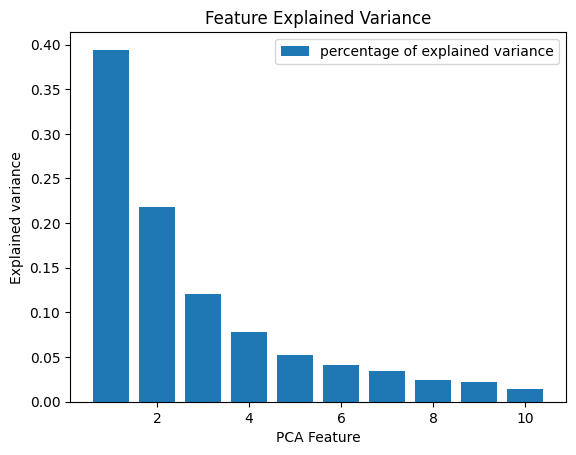

<BarContainer object of 10 artists>

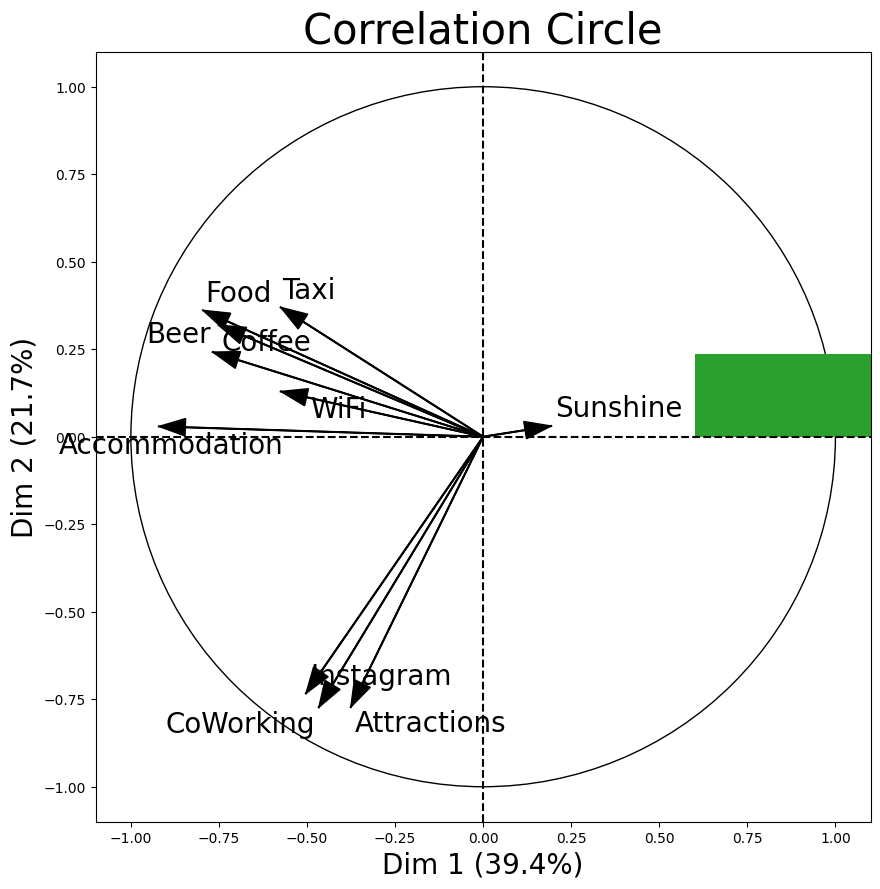

In [22]:
# create a bar plot
plt.bar(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    label='percentage of explained variance', align='center'
)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.legend(loc='best')
plt.show()


# Plot correlation circle for first two dimensions
figure, correlation_matrix = plot_pca_correlation_graph(data_s,
                                                        data.columns,
                                                        dimensions=(1, 2, 3 ),
                                                        figure_axis_size=10)

# create bar plot for first dimension
plt.bar(
    range(1,10+1),
    -np.sort(-np.abs(correlation_matrix['Dim 1']/np.sum(np.abs(correlation_matrix['Dim 1'])))),
    label='individual explained variance',  align='center'
    )

# create bar plot for second dimension
plt.bar(
    range(1,10+1),
    -np.sort(-np.abs(correlation_matrix['Dim 2']/np.sum(np.abs(correlation_matrix['Dim 2'])))),
    label='individual explained variance',  align='center'
    )

# create bar plot for third dimension
plt.bar(
    range(1,10+1),
    -np.sort(-np.abs(correlation_matrix['Dim 3']/np.sum(np.abs(correlation_matrix['Dim 2'])))),
    label='individual explained variance',  align='center'
    )



In [33]:
# Print eigenvalues
display(pca.explained_variance_)

# create data for PCA
data_ = pca.transform(data_s)
data_pca = data_[:, 0:3]
data_pca = pd.DataFrame(data_pca)

# Calculate the hopkins statistics
# print(hopkins_statistic(data_pca))

array([3.96855553, 2.19317279, 1.21956437, 0.79001913, 0.5272226 ,
       0.41539829, 0.34376494, 0.24265639, 0.22026267, 0.14787645])

## Clustering

In [34]:
# Prepare data for clustering
data_pca = np.array(data_pca)



### Silhouette score

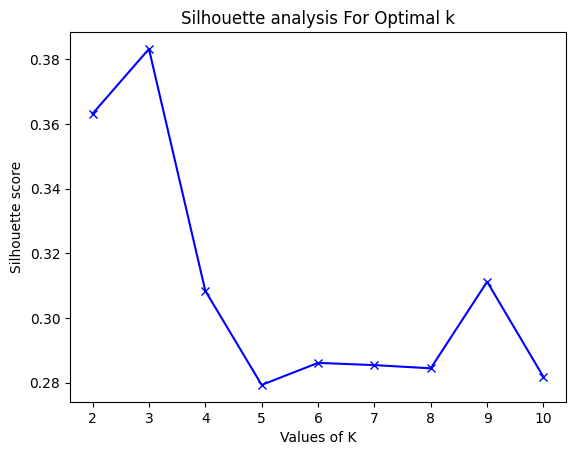

In [36]:

# Check Silhouette values
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # perform kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(data_pca)
    cluster_labels = kmeans.labels_
    
        # calculate silhouette score
    silhouette_avg.append(silhouette_score(data_pca, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

### Elbow method

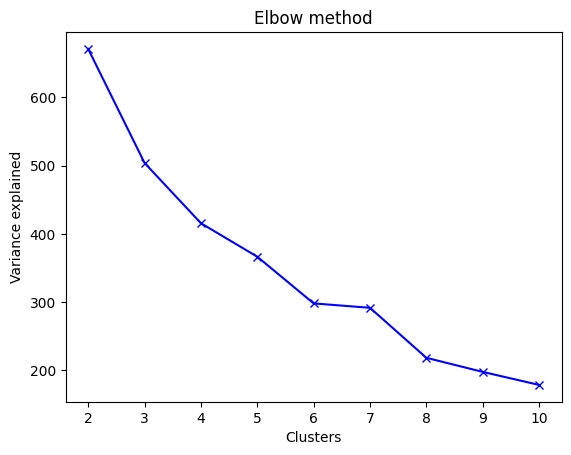

In [38]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
distortions = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(data_pca)
    cluster_labels = kmeans.labels_

    # silhouette score
    distortions.append(kmeans.inertia_)

plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Variance explained')
plt.title('Elbow method')
plt.show()

### Kmedoids 3 clusters (PAM)

In [39]:
# Perform PAM on chosen number of clusters
pam = KMedoids(n_clusters = 3).fit(data_pca)

# Save labels in a separate object
labels = pam.labels_

### Plot clusters

Text(0.5, 1.0, 'CLusters obtained using PAM')

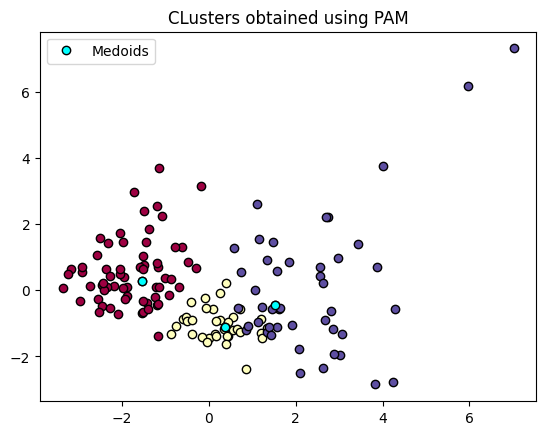

In [40]:
# Plot data split into clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k
    xy = data_pca[class_member_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6)

plt.plot(
    pam.cluster_centers_[:, 0],
    pam.cluster_centers_[:, 1],
    "o",
    markerfacecolor="cyan",
    markeredgecolor="k",
    markersize=6,
    label="Medoids")

plt.legend(loc='best')
plt.title("CLusters obtained using PAM")


### Display clusters

In [41]:
# Append labels to original dataset
raw_data['Assigned_label'] = labels

# Data for first cluster
display(raw_data[raw_data['Assigned_label']==0])

# Data for second cluster
display(raw_data[raw_data['Assigned_label']==1])

# Data for third cluster
display(raw_data[raw_data['Assigned_label']==2])

,Ranking,City,Country,WiFi,CoWorking,Coffee,Taxi,Beer,Accommodation,Food,Sunshine,Attractions,Instagram,Assigned_label
0,1,Bangkok,Thailand,28,117,1.56,0.82,3.08,415.18,1.54,2624,2262,28386616,0
1,2,New Delhi,India,12,165,1.42,0.19,2.90,179.25,2.90,2685,2019,28528249,0
2,3,Lisbon,Portugal,33,95,1.56,0.40,3.42,736.19,7.69,2806,1969,10205538,0
4,5,Buenos Aires,Argentina,17,67,1.22,0.47,2.16,229.55,5.15,2525,1660,21293975,0
5,5,Budapest,Hungary,37,40,1.20,0.72,2.40,366.66,4.81,1988,1468,14267880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,Hvar,Croatia,19,0,1.57,0.85,8.54,179.32,12.81,3535,85,880583,0
114,115,San Jose,Costa Rica,10,17,1.72,0.75,3.48,417.08,5.21,2081,305,5084798,0
120,121,Vientiane,Laos,5,3,1.64,1.43,1.64,366.07,2.51,3250,104,409470,0
129,130,La Paz,Bolivia,6,7,1.91,1.14,3.34,257.89,2.61,2289,211,1451813,0


,Ranking,City,Country,WiFi,CoWorking,Coffee,Taxi,Beer,Accommodation,Food,Sunshine,Attractions,Instagram,Assigned_label
57,58,Faro,Portugal,70,1,1.57,0.85,4.24,509.68,7.43,3036,167,1705160,1
58,59,Osaka,Japan,26,47,2.33,2.61,2.93,621.08,5.21,1996,790,16057725,1
64,65,Montreal,Canada,27,60,2.37,1.01,6.94,737.69,8.67,2051,793,18833685,1
70,71,Ljubljana,Slovenia,61,8,1.45,0.85,4.44,527.62,8.54,1974,422,1737701,1
72,73,Florence,Italy,18,13,1.12,0.85,8.54,650.53,12.81,2924,1377,10392587,1
74,75,Liverpool,United Kingdom,26,17,2.66,0.93,3.50,649.17,12.00,2199,1050,14834860,1
77,77,Tallinn,Estonia,37,14,2.43,0.51,6.82,466.50,8.52,1923,490,2861931,1
81,82,Kyoto,Japan,29,9,3.05,1.19,4.76,612.23,5.21,1775,1533,17684174,1
92,93,Brussels,Belgium,37,66,2.60,1.66,6.84,724.37,12.81,1546,747,7074355,1
96,97,Lyon,France,36,21,2.65,1.51,5.24,596.38,10.89,2002,502,9144123,1


,Ranking,City,Country,WiFi,CoWorking,Coffee,Taxi,Beer,Accommodation,Food,Sunshine,Attractions,Instagram,Assigned_label
3,4,Barcelona,Spain,37,136,1.59,1.01,5.12,768.46,10.25,2591,2739,62894055,2
11,12,Madrid,Spain,32,125,1.70,0.94,10.02,751.80,10.25,2769,1976,44165754,2
21,22,Singapore,Singapore,93,117,2.95,0.48,9.54,1455.77,7.28,2022,1561,41453533,2
29,30,Los Angeles,United States,58,105,3.39,1.21,10.08,1612.62,14.40,3254,1375,75436810,2
32,33,Hong Kong,Hong Kong,78,183,3.50,0.79,10.12,1581.43,5.56,1836,1330,39815830,2
35,36,Las Vegas,United States,47,21,3.36,1.45,8.64,826.39,10.80,3825,1420,40524360,2
37,38,San Francisco,United States,75,77,3.39,1.34,10.08,2149.04,14.34,3062,1490,30781286,2
38,38,Berlin,Germany,33,127,2.49,1.71,4.98,810.65,8.54,1626,1894,48461817,2
39,40,San Diego,United States,74,53,3.06,1.34,8.60,1553.79,10.75,3055,1118,29887093,2
40,41,Tokyo,Japan,32,163,2.65,2.75,6.54,1011.57,6.55,1881,3416,56623159,2


## Reproducible research R vs Python comparison

### The R code includes the file path for loading the data ("/Users/nataliamiela/Documents/master/UL/clustering project/workation.csv"). Although this specific path may be specific to the author's machine, it provides a clear indication of where the data should be located. However, this path would need to be modified to match the file location on the replicator's machine. 
### As an improvement, we load the data directly from working directory. We added an instruction how to check your working directory and how to use a new path.